#Tensor Basics:

In [ ]:
import torch

##Variable Declarations & Basic Operations:

###torch.empty() creates tensor with any data type you want, torch.Tensor() only creates tensors of type torch.FloatTensor. So torch.Tensor() is a special case of torch.empty()

In [ ]:
x = torch.empty(1) # scalar
print(x)
x = torch.empty(3) # array 1D
print(x)
x = torch.empty(2,3) # array 2D
print(x)
x = torch.empty(2,3) # array 3D
print(x)
print(x.shape)
x = torch.rand(2,2)
print(x)
x = torch.zeros(2,3)
print(x)
x = torch.ones(3,3)
print(x)

tensor([2.2981e-34])
tensor([-1.3774e+37,  4.5615e-41,  2.3039e-34])
tensor([[-1.3774e+37,  4.5615e-41,  2.3039e-34],
        [ 0.0000e+00,  6.2628e+00,  4.5615e-41]])
tensor([[1.8528e-34, 0.0000e+00, 2.2980e-34],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])
torch.Size([2, 3])
tensor([[0.5977, 0.8313],
        [0.9351, 0.0788]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
x = torch.ones(3,3)
print(x.dtype)
x = torch.ones(3,3,dtype = torch.int)
print(x.dtype)
print(x.size())
print(x.shape)

torch.float32
torch.int32
torch.Size([3, 3])
torch.Size([3, 3])


In [ ]:
x = torch.tensor([2,3])
print(x.shape)

torch.Size([2])


###Any function that has a trailing underscore "add_" will do its function in-place

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z = x + y # element-wise addition
print(z)
z = torch.add(x,y) # element-wise addition
print(z)
y.add_(x) # in-place addition
print(y)

tensor([[1.2117, 0.9824],
        [1.2194, 0.5482]])
tensor([[1.2117, 0.9824],
        [1.2194, 0.5482]])
tensor([[1.2117, 0.9824],
        [1.2194, 0.5482]])


##Slicing:

###If we have one element we can get its item using .item() function

In [ ]:
x = torch.rand(5,3)
print(x[:,0]) # first column and all the rows
print(x[0,:]) # first row and all columns
print(x[1,2]) # one element
print(x[1,2].item())

tensor([0.4060, 0.0146, 0.1298, 0.5327, 0.0468])
tensor([0.4060, 0.0432, 0.7630])
tensor(0.6038)
0.6038056015968323


##Reshaping:

In [ ]:
x = torch.rand(4,4)
print(x)
y = x.view(16) # 1D vector, no. of elements must be the same
print(y)
y = x.view(-1,8) # This will be 2X8
print(y)
print(y.shape)

tensor([[0.5364, 0.7047, 0.0173, 0.8284],
        [0.2784, 0.7399, 0.7040, 0.2059],
        [0.0178, 0.7920, 0.0271, 0.7192],
        [0.5300, 0.8264, 0.3430, 0.2937]])
tensor([0.5364, 0.7047, 0.0173, 0.8284, 0.2784, 0.7399, 0.7040, 0.2059, 0.0178,
        0.7920, 0.0271, 0.7192, 0.5300, 0.8264, 0.3430, 0.2937])
tensor([[0.5364, 0.7047, 0.0173, 0.8284, 0.2784, 0.7399, 0.7040, 0.2059],
        [0.0178, 0.7920, 0.0271, 0.7192, 0.5300, 0.8264, 0.3430, 0.2937]])
torch.Size([2, 8])


##converting from numpy to tensor and vice versa:

In [ ]:
import numpy as np

###If the tensor is on the CPU not the GPU then both tensor and numpy array will share the same memory location. Meaning that if we change one, it will affect the other.

In [ ]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a+=1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


##Checking for GPU & Moving Tensors to GPU:

In [ ]:
if(torch.cuda.is_available()):
  device = torch.device("cuda")
  x = torch.ones(5, device = device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y # This will be performed on the GPU
  #z.numpy() will give an error; as numpy is only available on cpu
  z = z.to("cpu")
  z.numpy

###Calculating Gradience:

In [ ]:
x = torch.rand(5, requires_grad = True) # This will tell PyTorch that it will need to calculate the gradience for this tensor later in the optimization step
print(x)

tensor([0.7941, 0.0098, 0.2807, 0.6435, 0.2227], requires_grad=True)


#Gradient Calculations:

### 1- Forward Pass: Compute the loss
### 2- Compute Local Gradients
### 3- Backward Pass: Compute dloss/dweights using the chain rule

###For each operation done to x, PyTorch will create a computation graph (y = x + 2, the inputs are x and 2 and + is in a node and the output is y. Using this graph with backpropagation, PyTorch can calculate the gradients.

In [ ]:
# rand is a uniform sitribution [0,1) but randn is a normal distribution (-1,1)
x = torch.randn(3, requires_grad = True)
y = x + 2
print(x)
print(y)
z = y * y * 2
z = z.mean()
print(z)
z.backward() # Calculates the gradient of z with respect to x dz/dx using chain rule and this works for SCALARS since z is a scalar
print(x.grad)

tensor([ 3.6317, -0.7236,  0.6677], requires_grad=True)
tensor([5.6317, 1.2764, 2.6677], grad_fn=<AddBackward0>)
tensor(26.9743, grad_fn=<MeanBackward0>)
tensor([7.5089, 1.7018, 3.5570])


In [ ]:
x = torch.randn(3, requires_grad = True)
y = x + 2
print(x)
print(y)
z = y * y * 2
print(z)
v = torch.tensor([0.1,1.0,0.001],dtype = torch.float32)
z.backward(v) # Calculates the gradient of z with respect to x dz/dx using chain rule passing a vector with the same size as z will make it work
print(x.grad)

tensor([-0.8228,  0.3881, -0.1317], requires_grad=True)
tensor([1.1772, 2.3881, 1.8683], grad_fn=<AddBackward0>)
tensor([ 2.7715, 11.4062,  6.9807], grad_fn=<MulBackward0>)
tensor([4.7087e-01, 9.5525e+00, 7.4730e-03])


##Prevent Tracking Gradients:

### We usually do this to variables that we don't want to be part of our computational graph

In [ ]:
# There are several ways
# 1- x.requires_grad_(False)
# 2- x.detach() This creates a new tensor that doesn't require the gradient
# 3- with torch.no_grad(): then do the operations inside this with
x.requires_grad_(False)
print(x)

x.requires_grad_(True)
print(x)
y = x.detach()
print(y)

with torch.no_grad():
  y = x + 2
  print(y)

tensor([-0.8228,  0.3881, -0.1317])
tensor([-0.8228,  0.3881, -0.1317], requires_grad=True)
tensor([-0.8228,  0.3881, -0.1317])
tensor([1.1772, 2.3881, 1.8683])


##Training Example:

### Gradients are accumulated by default. Therefore, we must empty the gradients before the next loop.

In [ ]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(2):
  model_output = (weights * 3).sum()
  model_output.backward()
  print(weights.grad) # For one iteration, it will output tensor([3., 3., 3., 3.]). For twp iterations, it will output tensor([6., 6., 6., 6.])
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


#Training & Prediction:

## Steps:
1.   Design Model(input size, output size, forward) forward is the layers
2.   Construct Loss & Optimizer
3.   Training Loop
    *   Forward Pass: Compute prediction
    *   Backward Pass: Gradients
    *   Update Weights






      





### Prediction: Manually
### Gradient Computation: Autograd
### Loss Computation: Manually
### Parameter Updates: Manually

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

# Forward pass 
def forward(x):
  return w * x

# Loss
def loss(y, y_predicted):
  return ((y_predicted - y) ** 2).mean()

print("Prediction before training: " + str(forward(5)) + "")

# Training
lr = 0.01
n_iters = 100

for epoch in range(n_iters):
  # Prediction = forward pass
  y_pred = forward(X)

  # Loss
  l = loss(Y, y_pred)

  # Gradients = backward pass
  l.backward() # dloss/dw

  # Update weights
  with torch.no_grad():
    w-= lr * w.grad

  # Zero gradients
  w.grad.zero_()

  if(epoch % 10 == 0):
    print("Epoch " + str(epoch + 1) + " weight = " + str(w.item()) + " loss = " +str(l.item()) +"")

print("Prediction after training: " + str(forward(5).item()) + "")

Prediction before training: tensor(0., grad_fn=<MulBackward0>)
Epoch 1 weight = 0.29999998211860657 loss = 30.0
Epoch 11 weight = 1.6653136014938354 loss = 1.1627856492996216
Epoch 21 weight = 1.934108853340149 loss = 0.0450688973069191
Epoch 31 weight = 1.987027645111084 loss = 0.0017468547448515892
Epoch 41 weight = 1.9974461793899536 loss = 6.770494655938819e-05
Epoch 51 weight = 1.9994971752166748 loss = 2.6243997126584873e-06
Epoch 61 weight = 1.9999010562896729 loss = 1.0175587306093803e-07
Epoch 71 weight = 1.9999804496765137 loss = 3.9741685498029256e-09
Epoch 81 weight = 1.999996304512024 loss = 1.4670220593870908e-10
Epoch 91 weight = 1.9999992847442627 loss = 5.076827847005916e-12
Prediction after training: 9.999998092651367


### Prediction: Manually
### Gradient Computation: Autograd
### Loss Computation: PyTorch Loss
### Parameter Updates: PyTorch Optimizer

In [ ]:
import torch.nn as nn

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

# Forward pass 
def forward(x):
  return w * x

print("Prediction before training: " + str(forward(5)) + "")

# Training
lr = 0.01
n_iters = 100
loss = nn.MSELoss() # loss is a callable function
optimizer = torch.optim.SGD([w], lr = lr)

for epoch in range(n_iters):
  # Prediction = forward pass
  y_pred = forward(X)

  # Loss
  l = loss(Y, y_pred)

  # Gradients = backward pass
  l.backward() # dloss/dw

  # Update weights
  optimizer.step()

  # Zero gradients
  optimizer.zero_grad()

  if(epoch % 10 == 0):
    print("Epoch " + str(epoch + 1) + " weight = " + str(w.item()) + " loss = " +str(l.item()) +"")

print("Prediction after training: " + str(forward(5).item()) + "")

Prediction before training: tensor(0., grad_fn=<MulBackward0>)
Epoch 1 weight = 0.29999998211860657 loss = 30.0
Epoch 11 weight = 1.6653136014938354 loss = 1.1627856492996216
Epoch 21 weight = 1.934108853340149 loss = 0.0450688973069191
Epoch 31 weight = 1.987027645111084 loss = 0.0017468547448515892
Epoch 41 weight = 1.9974461793899536 loss = 6.770494655938819e-05
Epoch 51 weight = 1.9994971752166748 loss = 2.6243997126584873e-06
Epoch 61 weight = 1.9999010562896729 loss = 1.0175587306093803e-07
Epoch 71 weight = 1.9999804496765137 loss = 3.9741685498029256e-09
Epoch 81 weight = 1.999996304512024 loss = 1.4670220593870908e-10
Epoch 91 weight = 1.9999992847442627 loss = 5.076827847005916e-12
Prediction after training: 9.999998092651367


### Prediction: PyTorch Model
### Gradient Computation: Autograd
### Loss Computation: PyTorch Loss
### Parameter Updates: PyTorch Optimizer

### We usually need to design our model. But, since linear regression is alredy implemented in PyTorch, we simply call nn.Linear. Otherwise, we would need to create a model class

In [ ]:
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)
X_test = torch.tensor([5], dtype = torch.float32)


n_samples, n_features = X.shape
print(n_samples, n_features)


input_size = n_features
output_size = n_features


# model = nn.Linear(input_size, output_size) we could do this since it is only one layer and already provided by PyTorch


# This is the general way
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # Define Layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)
print("Prediction before training: " + str(model(X_test).item()) + "")

# Training
lr = 0.01
n_iters = 100
loss = nn.MSELoss() # loss is a callable function
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for epoch in range(n_iters):
  # Prediction = forward pass
  y_pred = model(X)

  # Loss
  l = loss(Y, y_pred)

  # Gradients = backward pass
  l.backward() # dloss/dw

  # Update weights
  optimizer.step()

  # Zero gradients
  optimizer.zero_grad()

  if(epoch % 10 == 0):
    [w, b] = model.parameters()
    print("Epoch " + str(epoch + 1) + " weight = " + str(w[0][0].item()) + " loss = " +str(l.item()) +"")

print("Prediction after training: " + str(model(X_test).item()) + "")

4 1
Prediction before training: 3.8210551738739014
Epoch 1 weight = 0.7693529725074768 loss = 9.630396842956543
Epoch 11 weight = 1.483320713043213 loss = 0.4553367793560028
Epoch 21 weight = 1.6075764894485474 loss = 0.2059555947780609
Epoch 31 weight = 1.636699914932251 loss = 0.18820145726203918
Epoch 41 weight = 1.6502512693405151 loss = 0.17709803581237793
Epoch 51 weight = 1.6610361337661743 loss = 0.1667861044406891
Epoch 61 weight = 1.671121597290039 loss = 0.1570783108472824
Epoch 71 weight = 1.6808480024337769 loss = 0.14793552458286285
Epoch 81 weight = 1.690277338027954 loss = 0.13932493329048157
Epoch 91 weight = 1.6994264125823975 loss = 0.1312154084444046
Prediction after training: 9.397339820861816


#Linear Regression:

F = wx + b

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 

## 1- Generate Dataset:

In [ ]:
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

In [ ]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
print(X.shape)
print(Y.shape)

torch.Size([100, 1])
torch.Size([100])


In [ ]:
Y = Y.view(Y.shape[0],1) # Transform Y from row vector to column vector
print(X.shape)
print(Y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


##2- Model:

In [ ]:
n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # Define Layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

In [ ]:
model = LinearRegression(input_size, output_size)

In [ ]:
print(model)

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)


##3- Loss & Optimizer:

In [ ]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

##4- Training:

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):

  # Forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, Y)

  # Backward pass (calculating gradients)
  loss.backward()

  # Update
  optimizer.step()

  # Empty gradients
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print("Epoch " + str(epoch + 1) + " loss = " +str(loss.item()) +"")

Epoch 10 loss = 4450.9658203125
Epoch 20 loss = 3318.73193359375
Epoch 30 loss = 2499.74365234375
Epoch 40 loss = 1906.6920166015625
Epoch 50 loss = 1476.815185546875
Epoch 60 loss = 1164.925048828125
Epoch 70 loss = 938.4434204101562
Epoch 80 loss = 773.85107421875
Epoch 90 loss = 654.1484985351562
Epoch 100 loss = 567.034423828125


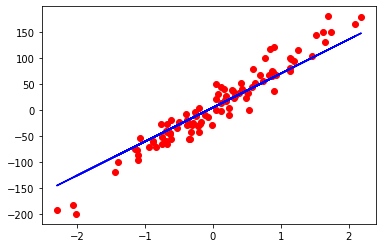

In [ ]:
predicted = model(X).detach().numpy() # Detach this operation to prevent it from being used in our computation graph
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

#Logistic Regression:

F = wx + b and sigmoid at the end

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

##1- Generating Dataset:

In [ ]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

In [ ]:
n_samples, n_features = x.shape
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


###StandardScaler will make our features have zero mean and unit variance. This is always recommended to do when we deal with logistic regression.

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([455, 30])
torch.Size([114, 30])
torch.Size([455])
torch.Size([114])


In [ ]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)

torch.Size([455, 1])
torch.Size([114, 1])


##2- Model:

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()

    # Define Layers
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [ ]:
model = LogisticRegression(n_features)

##3- Loss & Optimizer:

In [ ]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

##4- Training Loop:

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
  # Forward pass and loss
  y_predicted = model(x_train)
  loss = criterion(y_predicted, y_train)

  # Backward pass (calculating gradients)
  loss.backward()

  # Update
  optimizer.step()

  # Empty gradients
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print("Epoch " + str(epoch + 1) + " loss = " +str(loss.item()) +"")

Epoch 10 loss = 0.603636622428894
Epoch 20 loss = 0.48827680945396423
Epoch 30 loss = 0.41575825214385986
Epoch 40 loss = 0.36646655201911926
Epoch 50 loss = 0.3308294713497162
Epoch 60 loss = 0.3038000166416168
Epoch 70 loss = 0.28251707553863525
Epoch 80 loss = 0.2652551829814911
Epoch 90 loss = 0.25091785192489624
Epoch 100 loss = 0.23877714574337006


##5- Evalutaion:

In [ ]:
# To prevent tracking the gradient calculations for the below variables
with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_classes = y_predicted.round()
  acc = y_predicted_classes.eq(y_test).sum() / float(y_test.shape[0])
  print("accuracy = "+ str(acc) +"")

accuracy = tensor(0.9123)


#Dataset & Data Loader Classes:

### This is useful for large datasets



*   **Epoch:** Forward and backward pass for all training samples.
*   **batch_size:** No. of training samples in one forward and backward pass.
*   **Iterations:** No. of times we need to loop to cover all the training samples (one epoch).

Ex. 100 samples with batch size 20 will have 5 iterations to complete one epoch.



In [ ]:
!wget https://gist.github.com/tijptjik/9408623/archive/b237fa5848349a14a14e5d4107dc7897c21951f5.zip

--2023-03-09 16:50:02--  https://gist.github.com/tijptjik/9408623/archive/b237fa5848349a14a14e5d4107dc7897c21951f5.zip
Resolving gist.github.com (gist.github.com)... 140.82.112.3
Connecting to gist.github.com (gist.github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/9408623/zip/b237fa5848349a14a14e5d4107dc7897c21951f5 [following]
--2023-03-09 16:50:02--  https://codeload.github.com/gist/9408623/zip/b237fa5848349a14a14e5d4107dc7897c21951f5
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘b237fa5848349a14a14e5d4107dc7897c21951f5.zip’

b237fa5848349a14a14     [ <=>                ]   4.57K  --.-KB/s    in 0s      

2023-03-09 16:50:02 (10.1 MB/s) - ‘b237fa5848349a14a14e5d4107dc7897c21951f5.zip’ saved [4

In [ ]:
!unzip b237fa5848349a14a14e5d4107dc7897c21951f5.zip

Archive:  b237fa5848349a14a14e5d4107dc7897c21951f5.zip
b237fa5848349a14a14e5d4107dc7897c21951f5
   creating: 9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/
  inflating: 9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv  


In [ ]:
!cp /content/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv /content/

In [ ]:
import shutil
import os
os.remove("b237fa5848349a14a14e5d4107dc7897c21951f5.zip")
shutil.rmtree("9408623-b237fa5848349a14a14e5d4107dc7897c21951f5")

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

##Dataset:

In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    # Data loading
    xy = np.loadtxt("wine.csv", delimiter = ',', dtype = np.float32, skiprows = 1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # We took it like this so that the size will be (no. of samples, 1) intead of (no. of samples, )
    self.n_samples = xy.shape[0]
  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]
  def __len__(self):
    # len(dataset)
    return self.n_samples

In [ ]:
dataset = WineDataset()

In [ ]:
first_sample = dataset[0]
features, labels = first_sample

In [ ]:
print(features)
print(labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
tensor([1.])


##Dataloader:

In [ ]:
# Setting the argument num_workers as a positive integer will turn on multi-process data loading with the specified number of loader worker processes.
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data

In [ ]:
# Since batch_size = 4, we will have four numbers for the labels, since they are labels of 4 samples.
print(features)
print(labels)

tensor([[1.3500e+01, 3.1200e+00, 2.6200e+00, 2.4000e+01, 1.2300e+02, 1.4000e+00,
         1.5700e+00, 2.2000e-01, 1.2500e+00, 8.6000e+00, 5.9000e-01, 1.3000e+00,
         5.0000e+02],
        [1.3630e+01, 1.8100e+00, 2.7000e+00, 1.7200e+01, 1.1200e+02, 2.8500e+00,
         2.9100e+00, 3.0000e-01, 1.4600e+00, 7.3000e+00, 1.2800e+00, 2.8800e+00,
         1.3100e+03],
        [1.2510e+01, 1.2400e+00, 2.2500e+00, 1.7500e+01, 8.5000e+01, 2.0000e+00,
         5.8000e-01, 6.0000e-01, 1.2500e+00, 5.4500e+00, 7.5000e-01, 1.5100e+00,
         6.5000e+02],
        [1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02]])
tensor([[3.],
        [1.],
        [3.],
        [3.]])


## Training Loop:

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

In [ ]:
print(total_samples, n_iterations)

178 45


In [ ]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader): # enumerate will give us the index and the data
    if((i+1) % 5 == 0):
      print("Epoch: "+str(epoch+1)+"/"+str(num_epochs)+" step: "+str(i+1)+"/"+str(n_iterations)+" inputs: "+str(inputs.size())+""+" labels: "+str(labels.size())+"")

Epoch: 1/2 step: 5/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 10/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 15/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 20/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 25/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 30/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 35/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 40/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 1/2 step: 45/45 inputs: torch.Size([2, 13]) labels: torch.Size([2, 1])
Epoch: 2/2 step: 5/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 2/2 step: 10/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 2/2 step: 15/45 inputs: torch.Size([4, 13]) labels: torch.Size([4, 1])
Epoch: 2/2 step: 20/45 inputs: torch.Size([4, 13]) labels: torch.S

#Dataset Transforms:

* Transforms can be applied to PIL images, tensors, ndarrays, or custom data 
during creation of the Dataset

* complete list of built-in transforms:
https://pytorch.org/docs/stable/torchvision/transforms.html
* On Images

CenterCrop, Grayscale, Pad, RandomAffine RandomCrop, RandomHorizontalFlip, RandomRotation Resize, Scale
* On Tensors

LinearTransformation, Normalize, RandomErasing
* Conversion

ToPILImage: from tensor or ndrarray

ToTensor : from numpy.ndarray or PILImage

* Generic

Use Lambda
* Custom

Write own class
* Compose multiple Transforms

composed = transforms. Compose([Rescale(256),
RandomCrop(224)])

torchvision.transforms.ReScale(256)

torchvision.transforms.ToTensor()

In [ ]:
!wget https://gist.github.com/tijptjik/9408623/archive/b237fa5848349a14a14e5d4107dc7897c21951f5.zip

In [ ]:
!unzip b237fa5848349a14a14e5d4107dc7897c21951f5.zip

In [ ]:
!cp /content/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv /content/

In [ ]:
import shutil
import os
os.remove("b237fa5848349a14a14e5d4107dc7897c21951f5.zip")
shutil.rmtree("9408623-b237fa5848349a14a14e5d4107dc7897c21951f5")

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset):
  def __init__(self, transform=None):
    # Data loading
    xy = np.loadtxt("wine.csv", delimiter = ',', dtype = np.float32, skiprows = 1)
    self.n_samples = xy.shape[0]

    self.x = xy[:, 1:]
    self.y = xy[:, [0]] # We took it like this so that the size will be (no. of samples, 1) intead of (no. of samples, )
    
    self.transform = transform

  def __getitem__(self, index):
    # dataset[0]
    sample = self.x[index], self.y[index]
    if(self.transform):
      sample = self.transform(sample)
    return sample

  def __len__(self):
    # len(dataset)
    return self.n_samples

##Creating Custom Transforms:

In [ ]:
class ToTensor():
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

In [ ]:
dataset = WineDataset(transform = None)

In [ ]:
first_data = dataset[0]
features, labels = first_data 

In [ ]:
print(type(features), type(labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
dataset = WineDataset(transform = ToTensor())

In [ ]:
first_data = dataset[0]
features, labels = first_data 

In [ ]:
print(type(features), type(labels))
print(features)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])


In [ ]:
class MulTransform():
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

##Composed Transforms:

In [ ]:
composed = torchvision.transforms.Compose([ToTensor(),MulTransform(2)])

In [ ]:
dataset = WineDataset(transform = composed)

In [ ]:
first_data = dataset[0]
features, labels = first_data 

In [ ]:
print(type(features), type(labels))
print(features)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])


#Feed Forward Neural Network:

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
input_size = 784 # Because our images are of size 28 X 28
hidden_size = 100 # We can try different sizes
n_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.001

##Importing MNIST:

In [ ]:
train_dataset = torchvision.datasets.MNIST(root = "./data", train = True, transform = transforms.ToTensor(), download = True) # download = True means download it if it is not downloaded in the ./data directory
test_dataset = torchvision.datasets.MNIST(root = "./data", train = False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True) # shuffle = True makes it better for training
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
example = iter(train_loader)
samples, labels = next(example)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


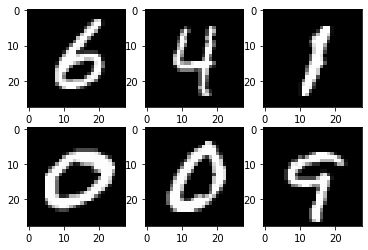

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1) # 2 rows & 3 columns
  plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

##Network Creation:

### We will not apply softmax in the last layer since we will be using PyTorch's cross entropy loss and it applies the softmax function

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, n_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, n_classes)

##Loss & Optmizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#Training Loop:

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
  for i, (images,labels) in enumerate(train_loader):# enumerate will give us the index and the data
    # images is 100, 1, 28, 28
    # we want 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if((i+1)%100 == 0):
      print("Epoch: "+str(epoch+1)+"/"+str(n_epochs)+", Step: "+str(i+1)+"/"+str(n_total_steps)+", loss: "+str(loss.item())+"")

Epoch: 1/2, Step: 100/600, loss: 0.37781304121017456
Epoch: 1/2, Step: 200/600, loss: 0.3390708863735199
Epoch: 1/2, Step: 300/600, loss: 0.19096477329730988
Epoch: 1/2, Step: 400/600, loss: 0.2176024317741394
Epoch: 1/2, Step: 500/600, loss: 0.28206324577331543
Epoch: 1/2, Step: 600/600, loss: 0.24062994122505188
Epoch: 2/2, Step: 100/600, loss: 0.12743119895458221
Epoch: 2/2, Step: 200/600, loss: 0.16623765230178833
Epoch: 2/2, Step: 300/600, loss: 0.20040565729141235
Epoch: 2/2, Step: 400/600, loss: 0.1089562326669693
Epoch: 2/2, Step: 500/600, loss: 0.1645544022321701
Epoch: 2/2, Step: 600/600, loss: 0.1631811559200287


##Testing & Evaluation:

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # value, index
    _,predictions = torch.max(outputs, 1) # Get the maximum no. along the first dimension

    # no. of samples in the current batch (should be 100)
    n_samples += labels.shape[0]
    
    n_correct += (predictions == labels).sum().item()

  acc = (100 * n_correct)/n_samples
  print("Accuracy = "+ str(acc) +"")

Accuracy = 95.4


#Convolutional Neural Network:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
n_epochs = 4
batch_size = 4
learning_rate = 0.001

##Importing CIFAR & Using Transformations:

In [ ]:
# Dataset has PIL images of range [0,1]
# We will transform them to tensors of range [-1,1]
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
        ])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root = "./data", train = True, transform = transform, download = True) # download = True means download it if it is not downloaded in the ./data directory
test_dataset = torchvision.datasets.CIFAR10(root = "./data", train = False, transform = transform, download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True) # shuffle = True makes it better for training
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
example = iter(train_loader)
samples, labels = next(example)
print(samples.shape, labels.shape)

torch.Size([4, 3, 32, 32]) torch.Size([4])


##Network Creation:

### In the fully connected layers we can change any size except for the input size to the first FC layer and the output of the last FC layer

Output size calculation after passing through conv/pooling layer:

(W-F + 2P)/S + 1

W: Size of input image
F: Size of kernel
P: Padding
S: Stride

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5) # input channel size is 3 becuase images are rgb, output channel size is 6, and kernel size is 5 X 5
    self.pool = nn.MaxPool2d(2,2) # kernel size is 2 X 2 and stride is 2
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120) # The last layer produced an output that had 16 channels and 5 X 5 shape for each channel. So, by flattening them we get 16 X 5 X 5
    self.fc2 = nn.Linear(120,84) # input size is 120 and output size is 84
    self.fc3 = nn.Linear(84,10) # input size is 84 and output size is 10 as we have 10 output classes
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    # To quickly know what size to put in the first linear layer print the shape of x
    # print(x.shape)
    # Flatten x
    x = x.view(-1, 16*5*5) # -1 is the number of batches, so it should be 4
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
model = ConvNet().to(device)

In [ ]:
# To quickly know what size to put in the first linear layer
# image = torch.ones(1,3,32,32)
# print(image.shape)
# output = model(image)

##Loss & Optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

##Training Loop:

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
  for i, (images,labels) in enumerate(train_loader):# enumerate will give us the index and the data
    # images is 4, 3, 32, 32
    # we want 4, 3, 1024
    # input layer = 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if((i+1)%2000 == 0):
      print("Epoch: "+str(epoch+1)+"/"+str(n_epochs)+", Step: "+str(i+1)+"/"+str(n_total_steps)+", loss: "+str(loss.item())+"")
print("Finished Training!!")

Epoch: 1/4, Step: 2000/12500, loss: 1.4528508186340332
Epoch: 1/4, Step: 4000/12500, loss: 1.4194371700286865
Epoch: 1/4, Step: 6000/12500, loss: 0.9429278373718262
Epoch: 1/4, Step: 8000/12500, loss: 1.4249820709228516
Epoch: 1/4, Step: 10000/12500, loss: 0.7920148968696594
Epoch: 1/4, Step: 12000/12500, loss: 1.2776896953582764
Epoch: 2/4, Step: 2000/12500, loss: 1.3328248262405396
Epoch: 2/4, Step: 4000/12500, loss: 1.4147534370422363
Epoch: 2/4, Step: 6000/12500, loss: 1.420710563659668
Epoch: 2/4, Step: 8000/12500, loss: 0.8946384191513062
Epoch: 2/4, Step: 10000/12500, loss: 1.3212822675704956
Epoch: 2/4, Step: 12000/12500, loss: 1.476868748664856
Epoch: 3/4, Step: 2000/12500, loss: 0.6034020781517029
Epoch: 3/4, Step: 4000/12500, loss: 1.908227801322937
Epoch: 3/4, Step: 6000/12500, loss: 0.7130082845687866
Epoch: 3/4, Step: 8000/12500, loss: 1.1420385837554932
Epoch: 3/4, Step: 10000/12500, loss: 0.6588274836540222
Epoch: 3/4, Step: 12000/12500, loss: 0.8213160037994385
Epoch: 

##Testing & Evaluation:

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    # value, index
    _,predictions = torch.max(outputs, 1) # Get the maximum no. along the first dimension

    # no. of samples in the current batch (should be 100)
    n_samples += labels.shape[0]
    
    n_correct += (predictions == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predictions[i]
      if(label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = (100 * n_correct)/n_samples
  print("Accuracy = "+ str(acc) +"")

  for i in range(10):
    acc = (100 * n_class_correct[i])/n_class_samples[i]
    print("Accuracy of "+ classes[i] +": "+str(acc)+"%")

Accuracy = 61.15
Accuracy of plane: 62.9%
Accuracy of car: 74.9%
Accuracy of bird: 45.5%
Accuracy of cat: 40.2%
Accuracy of deer: 47.7%
Accuracy of dog: 53.9%
Accuracy of frog: 74.6%
Accuracy of horse: 64.0%
Accuracy of ship: 74.7%
Accuracy of truck: 73.1%


#Transfer Learning & Fine-tuning:

### A model trained on one task can be loaded and modified a little to be used on another task. Transfer learning is freezing layers that were previously trained (model) and (optional) adding some new trainable layers, or, training the last layers. While fine-tuning is unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate.

### Example: take a model that is trained to classify 1000 classes and make it classify only two

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

##Importing Dataset & Tranformations:

In [ ]:
!mkdir data

In [ ]:
cd /content/data/

/content/data


In [ ]:
!wget https://github.com/jaddoescad/ants-bees-dataset/archive/refs/heads/master.zip

--2023-03-13 20:47:42--  https://github.com/jaddoescad/ants-bees-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jaddoescad/ants-bees-dataset/zip/refs/heads/master [following]
--2023-03-13 20:47:42--  https://codeload.github.com/jaddoescad/ants-bees-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47285500 (45M) [application/zip]
Saving to: ‘master.zip’

master.zip          100%[===================>]  45.09M   144MB/s    in 0.3s    

2023-03-13 20:47:42 (144 MB/s) - ‘master.zip’ saved [47285500/47285500]



In [ ]:
!unzip master.zip

Archive:  master.zip
37ab5b5f0b73ff225fc7d4cf1861e8d2a3babac6
   creating: ants-bees-dataset-master/
  inflating: ants-bees-dataset-master/.DS_Store  
   creating: ants-bees-dataset-master/train/
  inflating: ants-bees-dataset-master/train/.DS_Store  
   creating: ants-bees-dataset-master/train/ants/
  inflating: ants-bees-dataset-master/train/ants/0013035.jpg  
  inflating: ants-bees-dataset-master/train/ants/1030023514_aad5c608f9.jpg  
  inflating: ants-bees-dataset-master/train/ants/1095476100_3906d8afde.jpg  
  inflating: ants-bees-dataset-master/train/ants/1099452230_d1949d3250.jpg  
  inflating: ants-bees-dataset-master/train/ants/116570827_e9c126745d.jpg  
  inflating: ants-bees-dataset-master/train/ants/1225872729_6f0856588f.jpg  
  inflating: ants-bees-dataset-master/train/ants/1262877379_64fcada201.jpg  
  inflating: ants-bees-dataset-master/train/ants/1269756697_0bce92cdab.jpg  
  inflating: ants-bees-dataset-master/train/ants/1286984635_5119e80de1.jpg  
  inflating: ants-be

In [ ]:
os.rename("/content/data/ants-bees-dataset-master", "/content/data/hymenoptera_data")

In [ ]:
os.remove("/content/data/master.zip")

In [ ]:
cd /content/

/content


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
}

In [ ]:
data_dir = 'data/hymenoptera_data'
sets = ['train', 'val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=0) for x in ['train', 'val']}

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
print(dataset_sizes)
print(class_names)

{'train': 244, 'val': 153}
['ants', 'bees']


##Training Loop:

###train() sets the modules in the network in training mode. It tells our model that we are currently in the training phase so the model keeps some layers, like dropout, batch-normalization which behaves differently depends on the current phase, active. whereas the model. eval() does the opposite.

###A deep copy creates a new compound object before inserting copies of the items found in the original into it in a recursive manner. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In the case of deep copy, a copy of the object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 

![Deep Copy.](https://media.geeksforgeeks.org/wp-content/uploads/deep-copy.jpg)


###A shallow copy creates a new compound object and then references the objects contained in the original within it, which means it constructs a new collection object and then populates it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. In the case of shallow copy, a reference of an object is copied into another object. It means that any changes made to a copy of an object do reflect in the original object. In python, this is implemented using the “copy()” function. 

![Shallow Copy.](https://media.geeksforgeeks.org/wp-content/uploads/shallow-copy.jpg)


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step() #scheduler is used to change the learning rate during training

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

##Loading Pretrained Model & Changing Last Layer:

###Fine-tuning:

In [ ]:
model = models.resnet18(pretrained = True)
# We will replace the number of features in the last layer
num_ftrs = model.fc.in_features
print(num_ftrs)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

512


In [ ]:
# Create a new fully connected layer instead of the last layer
model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

##Loss & Optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Scheduler

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1) # Every 7 epochs, out lr is multiplied by 0.1

In [ ]:
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs = 4)

Epoch 0/3
----------
train Loss: 0.6482 Acc: 0.6270
val Loss: 0.5344 Acc: 0.7647

Epoch 1/3
----------
train Loss: 0.5515 Acc: 0.7295
val Loss: 0.3891 Acc: 0.8889

Epoch 2/3
----------
train Loss: 0.5056 Acc: 0.7377
val Loss: 0.3279 Acc: 0.9216

Epoch 3/3
----------
train Loss: 0.3958 Acc: 0.8443
val Loss: 0.2839 Acc: 0.8954

Training complete in 5m 51s
Best val Acc: 0.921569


###Transfer Learning: (will be faster than fine-tuning)

In [ ]:
model = models.resnet18(pretrained = True)
# Freeze all the layers to prevent changing the weights while training
for param in model.parameters():
  param.requires_grad = False
# We will replace the number of features in the last layer
num_ftrs = model.fc.in_features
print(num_ftrs)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512


In [ ]:
# This new layer has by param.requires_grad = True by default
model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Scheduler

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1) # Every 7 epochs, out lr is multiplied by 0.1

In [ ]:
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs = 4)

Epoch 0/3
----------
train Loss: 0.7012 Acc: 0.5656
val Loss: 0.5657 Acc: 0.7451

Epoch 1/3
----------
train Loss: 0.6220 Acc: 0.6475
val Loss: 0.4737 Acc: 0.7843

Epoch 2/3
----------
train Loss: 0.5782 Acc: 0.7008
val Loss: 0.3743 Acc: 0.8758

Epoch 3/3
----------
train Loss: 0.4821 Acc: 0.7869
val Loss: 0.3222 Acc: 0.9346

Training complete in 2m 47s
Best val Acc: 0.934641


#Saving & Loading Models:

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, n_input_features):
    super(Model, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [ ]:
model = Model(6)

##Lazy Method:

In [ ]:
File = "model.pth"
torch.save(model,File) #Saves a dictionary

In [ ]:
model = torch.load(File)
model.eval()

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.0204,  0.1016,  0.1457, -0.1265,  0.2453,  0.1908]],
       requires_grad=True)
Parameter containing:
tensor([-0.1675], requires_grad=True)


##Recommended Method:

In [ ]:
torch.save(model.state_dict(), File) #Saves a dictionary

In [ ]:
loaded_model = Model(6)
loaded_model.load_state_dict(torch.load(File))
loaded_model.eval()

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [ ]:
for param in loaded_model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.0204,  0.1016,  0.1457, -0.1265,  0.2453,  0.1908]],
       requires_grad=True)
Parameter containing:
tensor([-0.1675], requires_grad=True)


###Examining the state_dict:

In [ ]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.0204,  0.1016,  0.1457, -0.1265,  0.2453,  0.1908]])), ('linear.bias', tensor([-0.1675]))])


##Save a checkpoint during training:

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


In [ ]:
checkpoint = {
    "epoch": 90,
    "model_state": model.state_dict(),
    "optim_state": optimizer.state_dict()
}
torch.save(checkpoint, "checkpoint.pth")

In [ ]:
loaded_checkpoint = torch.load("checkpoint.pth")

In [ ]:
epoch = loaded_checkpoint["epoch"]
model = Model(6)
optimizer = torch.optim.SGD(model.parameters(), lr = 0) #Even with lr = 0, when we load it we will get the lr that was saved before
model.load_state_dict(checkpoint["model_state"])
optimizer.load_state_dict(checkpoint["optim_state"])

In [ ]:
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


##Saving on GPU & Loading on CPU

In [ ]:
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(),File)

In [ ]:
device = torch.device("cpu")
model = Model(6)
model.load_state_dict(torch.load(File, map_location = device))

<All keys matched successfully>

##Saving on GPU & Loading on GPU

In [ ]:
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(),File)

In [ ]:
model = Model(6)
model.load_state_dict(torch.load(File))
model.to(device)

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

##Saving on CPU & Loading on GPU

In [ ]:
torch.save(model.state_dict(),File)

In [ ]:
device = torch.device("cuda")
model = Model(6)
model.load_state_dict(torch.load(File, map_location = "cuda:0")) #Any GPU device number that I want
model.to(device)

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

#Recurrent Neural Network:

###In this section, we will use a recurrent neural net to classify names (say which country this name belongs to).

##Downloading Names Dataset:



In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip

--2023-03-25 18:02:22--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 52.222.139.90, 52.222.139.21, 52.222.139.109, ...
Connecting to download.pytorch.org (download.pytorch.org)|52.222.139.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  4.34MB/s    in 0.6s    

2023-03-25 18:02:23 (4.34 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [ ]:
import os

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [ ]:
os.remove("data.zip")

In [ ]:
import io
import unicodedata
import string
import glob
import torch
import random

##Utilities:

In [ ]:
# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

In [ ]:
print(ALL_LETTERS)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


In [ ]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
# Removes any special characters and keeps only ASCII
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

In [ ]:
print(unicode_to_ascii('Ślusàrski'))

Slusarski


In [ ]:
def load_data():
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []
    
    def find_files(path):
        return glob.glob(path)
    
    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]
    
    for filename in find_files('data/names/*.txt'):
        category = os.path.splitext(os.path.basename(filename))[0]
        all_categories.append(category)
        
        lines = read_lines(filename)
        category_lines[category] = lines
        
    return category_lines, all_categories

In [ ]:
category_lines, all_categories = load_data()
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


To represent a single letter, we use a “one-hot vector” of 
size (1 x n_letters). 

A one-hot vector is filled with 0s
except for a 1 at index of the current letter, e.g. "b" = (0 1 0 0 0 ...).

To make a word we join a bunch of those into a
2D matrix (line_length x 1 x n_letters). We say line_length because each line is a single word.


That extra 1 dimension is because PyTorch assumes
everything is in batches - we’re just using a batch size of 1 here.

In [ ]:
# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return ALL_LETTERS.find(letter)

In [ ]:
# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, N_LETTERS)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

In [ ]:
print(letter_to_tensor('J'))
print(letter_to_tensor('J').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])


In [ ]:
# Turn a line into a <line_length x 1 x n_letters>, or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor

In [ ]:
print(line_to_tensor('Jones'))
print(line_to_tensor('Jones').size())

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
def random_training_example(category_lines, all_categories):
    
    def random_choice(a):
        random_idx = random.randint(0, len(a) - 1)
        return a[random_idx]
    
    category = random_choice(all_categories)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

##Architecture:

![RNN.](https://i.imgur.com/Z2xbySO.png)


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# If the utilities were in a different folder we would import them like this:
# from utils import ALL_LETTERS, N_LETTERS
# from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [ ]:
# There is already a built-in RNN class which we will use later
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size
    self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
    self.input_to_output = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim = 1) # Our input is of shape 1=(1,57), we only need the second dimension (57), So, we specify that we want the second dimension as input to the softmax layer

  def forward(self, input_tensor, hidden_tensor):
    combined = torch.cat((input_tensor, hidden_tensor), 1) # We combined our two tensors along dimension 1
        
    hidden = self.input_to_hidden(combined)
    output = self.input_to_output(combined)
    output = self.softmax(output)
    return output, hidden
  
  def initial_hidden(self):
        return torch.zeros(1, self.hidden_size)


In [ ]:
category_lines, all_categories = load_data()
n_categories = len(all_categories)

In [ ]:
n_hidden = 128 # Hyper parameter
rnn = RNN(N_LETTERS, n_hidden, n_categories)

In [ ]:
# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.initial_hidden()

In [ ]:
output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [ ]:
# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.initial_hidden()

In [ ]:
output, next_hidden = rnn(input_tensor[0], hidden_tensor) # input_tensor[0] is the first letter
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [ ]:
# The output of the softmax will be the likelihood of each category, so, we choose the biggest number
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [ ]:
print(category_from_output(output))

Greek


##Training:

In [ ]:
criterion = nn.NLLLoss() # Negative log likelihood loss
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

In [ ]:
# category_tensor is the actual class label
def train(line_tensor, category_tensor):
    hidden = rnn.initial_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden) # We do this for the whole name and after we finish with the last letter, we calculate the loss
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

In [ ]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000

In [ ]:
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")

5000 5.0 2.4894 Noh / Chinese WRONG (Korean)
10000 10.0 0.5214 Giannakos / Greek CORRECT
15000 15.0 2.6884 Daele / Irish WRONG (Dutch)
20000 20.0 0.6571 Nakatoni / Japanese CORRECT
25000 25.0 2.1837 Hiro / Portuguese WRONG (Japanese)
30000 30.0 0.5044 Sotiris / Greek CORRECT
35000 35.0 0.8844 Delacroix / French CORRECT
40000 40.0 3.5625 Fonseca / Dutch WRONG (Portuguese)
45000 45.0 1.3413 Guerra / Portuguese WRONG (Spanish)
50000 50.0 0.6482 Ban / Chinese CORRECT
55000 55.00000000000001 0.4844 Achteren / Dutch CORRECT
60000 60.0 0.3718 Sarraf / Arabic CORRECT
65000 65.0 1.3559 Leclair / Scottish WRONG (French)
70000 70.0 0.8900 Ortega / Spanish CORRECT
75000 75.0 0.1659 Vescovi / Italian CORRECT
80000 80.0 2.2688 Bazzi / Italian WRONG (Arabic)
85000 85.0 3.2687 Simon / English WRONG (German)
90000 90.0 0.2480 Vlahos / Greek CORRECT
95000 95.0 1.7333 Nyashin / Japanese WRONG (Russian)
100000 100.0 1.2350 Ding / Vietnamese WRONG (Chinese)


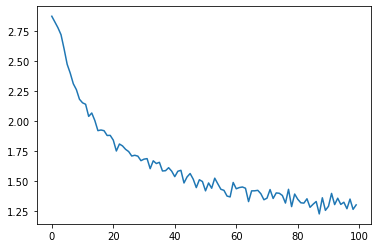

In [ ]:
plt.figure()
plt.plot(all_losses)
plt.show()

## Prediction:

In [ ]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.initial_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)

In [ ]:
while True:
    sentence = input("Input:")
    if sentence == "quit":
        break
    
    predict(sentence)

Input:Nader

> Nader
Arabic
Input:Antipas

> Antipas
Dutch
Input:Aihara

> Aihara
Japanese
Input:Baumann

> Baumann
Dutch
Input:Bäcker

> Bäcker
German
Input:quit


#Built-in RNN, LSTM & GRU:

###We are going to use image data here to show that even with images as inputs, we must turn them into sequences.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters 
# input_size = 784 # 28x28
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# We will look at the image, one row at a time
input_size = 28
sequence_length = 28
hidden_size = 128
num_layers = 2 # We will stack two RNNs and the second RNN will take as an input the output of the first RNN

##Loading Dataset:

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [7]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

##Model Architecture:

In [8]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # batch_first = True means we must have batch as first dimension
        # So, our input needs to have the shape: (batch_size, sequence_length, input_size)
        
        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # We only need the last hidden_size as input to our linear layer
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        #c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        # x: (n, 28, 28), h0: (2, n, 128)
        
        # Forward propagate RNN
        # The other output is the hidden state for step n which we don't need
        out, _ = self.rnn(x, h0)  
        # or:
        #out, _ = self.lstm(x, (h0,c0))  
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)
        
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
         
        out = self.fc(out)
        # out: (n, 10)
        return out

In [9]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

##Training:

In [11]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [N, 1, 28, 28]
        # we want it to be resized: [N, 28, 28]
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.8669
Epoch [1/2], Step [200/600], Loss: 0.7431
Epoch [1/2], Step [300/600], Loss: 0.6026
Epoch [1/2], Step [400/600], Loss: 0.5060
Epoch [1/2], Step [500/600], Loss: 0.4642
Epoch [1/2], Step [600/600], Loss: 0.3704
Epoch [2/2], Step [100/600], Loss: 0.4183
Epoch [2/2], Step [200/600], Loss: 0.3961
Epoch [2/2], Step [300/600], Loss: 0.3605
Epoch [2/2], Step [400/600], Loss: 0.1822
Epoch [2/2], Step [500/600], Loss: 0.2809
Epoch [2/2], Step [600/600], Loss: 0.2397


##Testing:

In [12]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 92.8 %
